## SP500
##### Ref: 

In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel

init_notebook_mode(connected=True) ## plotly init

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

In [2]:
df_sp500 = pd.read_csv(path_data + 'Data_Application.csv')# 'sp500.csv')
df_sp500_bis = pd.read_csv(path_data + 'sp500.csv')

In [3]:
df_sp500.shape, df_sp500_bis .shape

((8372, 5), (1768, 10))

In [4]:
df_sp500.head()

,Date,SP500,T10yAaa.lag,AaaBaa.lag,T10yT1y.lag
0,1986-01-03,0.006136,0.88,1.46,1.40
1,1986-01-06,-0.001091,0.87,1.43,1.40
2,1986-01-07,0.014843,0.87,1.42,1.43
3,1986-01-08,-0.027647,0.91,1.44,1.35
4,1986-01-09,-0.008984,0.76,1.45,1.40


In [5]:
df_sp500_bis.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


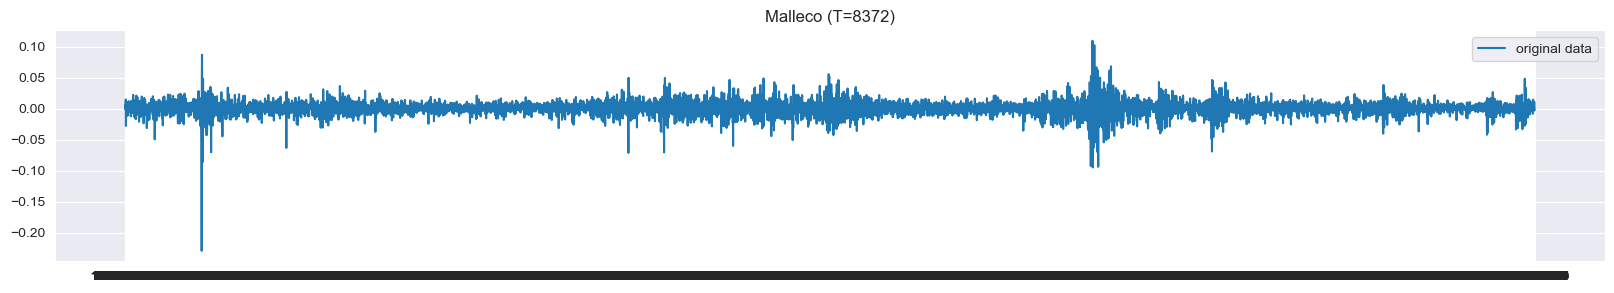

In [6]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_sp500['Date'], df_sp500['SP500'], label="original data")
# plt.plot(df_sp500['Date'], df_sp500['SP500'].diff(), label="diff")
plt.legend()
plt.title("Malleco (T=8372)")
plt.show()

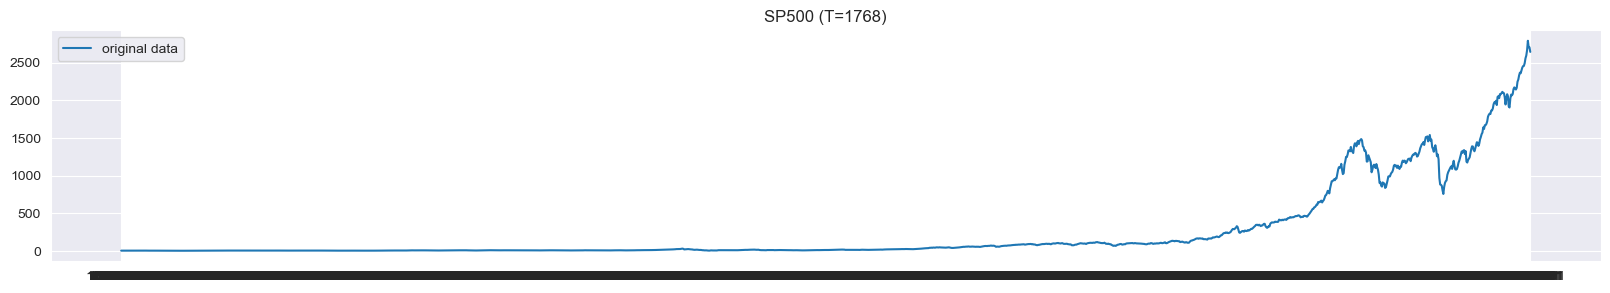

In [7]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_sp500_bis['Date'], df_sp500_bis['SP500'], label="original data")
plt.legend()
plt.title("SP500 (T=1768)")
plt.show()

# Nadara-Watson estimator 

In [ ]:
# C = 2
space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_sp500.shape[0]
d = 1
bandwidth = T **(-0.4 / (d+1)) / 10
X_dict = df_sp500['SP500'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_sp500['SP500'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_sp500['SP500'].values

weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)

In [ ]:
m_hat = [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"
plt.rcParams["figure.figsize"] = (10,5)

u_var = np.linspace(0., 1., T)
plt.plot(X_tvar_2, lw=1, label="LSP")
plt.plot(np.array(m_hat), lw=2, label="Condional mean function")
plt.xlim(0, T)
plt.legend()
plt.tight_layout()
plt.savefig(path_fig+"locally_process_conditional_mean_Guassina_space_kernel_uniform_tiem_kernel.pdf", dpi=150)